In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from matplotlib import style
style.use('ggplot')
style.use('seaborn-ticks')

## Разведочный анализ

In [66]:
df = pd.read_csv('bank.csv', delimiter=';')
df.shape

(41188, 21)

In [67]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Посмотрим, есть ли пропущенные значения (их нет)

In [68]:
df.isna().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

Разделим признаки на числовые и категориальные

In [69]:
data_types = df.dtypes
cat_cols = [df.columns[i] for i in range(df.shape[1]-1) if data_types[i] == 'O']
num_cols = [df.columns[i] for i in range(df.shape[1]-1) if data_types[i] != 'O']
target_col = 'y'

Проверим данные на наличие дубликатов

In [70]:
df[df.duplicated(keep = 'first')].shape # есть 12 дубликатов, уберем их

(12, 21)

In [71]:
df.drop_duplicates(inplace = True)

Посмотрим описание данных

In [72]:
df[num_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [73]:
df[cat_cols].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551


Посмотрим на уникальные значения категориальных признаков

In [74]:
[df[col].unique() for col in cat_cols] # есть значения unknown (это и в описании датасета написано), это не очень хорошо, то же, что и пропуски

[array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object),
 array(['telephone', 'cellular'], dtype=object),
 array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object)]

Посмотрим сколько unknownов в датасете (есть хотя бы в одной категориальной колонке)

In [75]:
df[df[cat_cols].isin(['unknown']).any(axis=1)].shape # таких почти четверть, пока ничего не будем делать с этим, хорошо, что мы просто исследуем данные, а не обучаем модели

(10698, 21)

Из документации видно, что pdays равен 999 - это значит, что клиенту предварительно не звонили, это желательно перекодировать, т.к. это числовой признак

In [76]:
df['pdays'].unique() 

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [77]:
df[df['pdays'] == 999].shape # почти никому не звонили

(39661, 21)

Вообще очевидно, что перед обучением моделей на бинарную классификацию признаки можно поделить как в описании датасета: на банковскую информацию, информацию о последнем контакте с клиентом, экономические характеристики и др.
Сейчас просто уберем pdays и перекодируем столбец y в нули и единицы

In [78]:
num_cols.remove('pdays')
df['y'].replace({'yes':1,'no':0}, inplace = True)

Визуализация

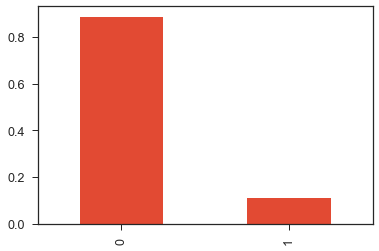

In [79]:
df['y'].value_counts(normalize=True).plot.bar(); # гистограмма результирующего признака

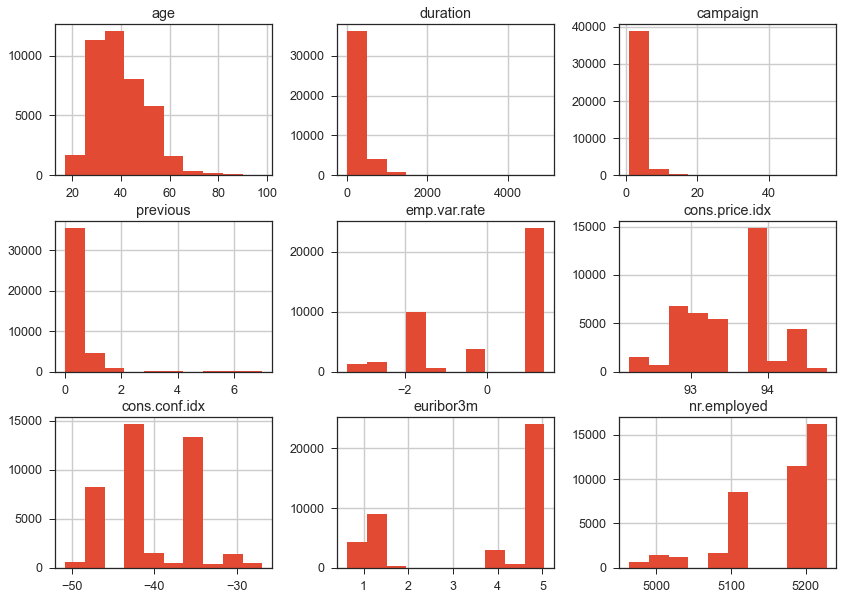

In [80]:
df.hist(column=num_cols, figsize=(14, 10)); # Посмотрим на распредление числовых величин

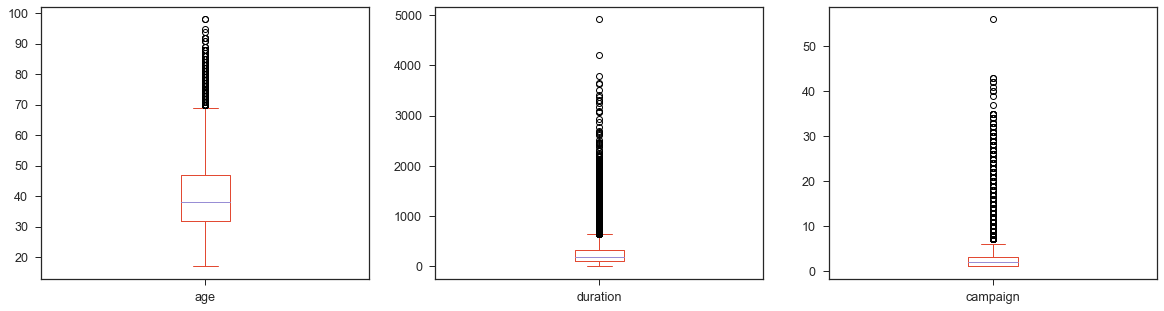

In [81]:
df[num_cols[:3]].plot.box(subplots = True, figsize = (20, 5)); # боксплоты для первых трех числовых признаков

Посмотрим на корреляции между признаками

In [82]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2) #корреляция между признаками и целевой колонкой не особо высокая

<ipython-input-82-8c92d75e7cc8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2) #корреляция между признаками и целевой колонкой не особо высокая


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,-0.00,0.00,-0.03,0.02,-0.00,0.00,0.13,0.01,-0.02,0.03
duration,-0.00,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.03,-0.04,0.41
campaign,0.00,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,0.14,-0.07
pdays,-0.03,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.30,0.37,-0.32
previous,0.02,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.45,-0.50,0.23
emp.var.rate,-0.00,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.97,0.91,-0.30
cons.price.idx,0.00,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.69,0.52,-0.14
cons.conf.idx,0.13,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.28,0.10,0.05
euribor3m,0.01,-0.03,0.14,0.30,-0.45,0.97,0.69,0.28,1.00,0.95,-0.31
nr.employed,-0.02,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,0.95,1.00,-0.35


## Визуализация распределения признаков, оценка параметров

Посмотрим какие количественные признаки можно было бы проанализировать кроме тех, которые уже были рассмотрены на занятии. Посмотрим сколько уникальных значений и распределения

In [83]:
for col in num_cols:
    print(col, len(df[col].unique()))

age 78
duration 1544
campaign 42
previous 8
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11


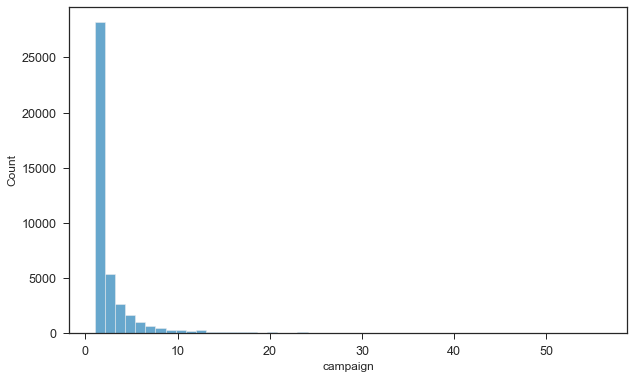

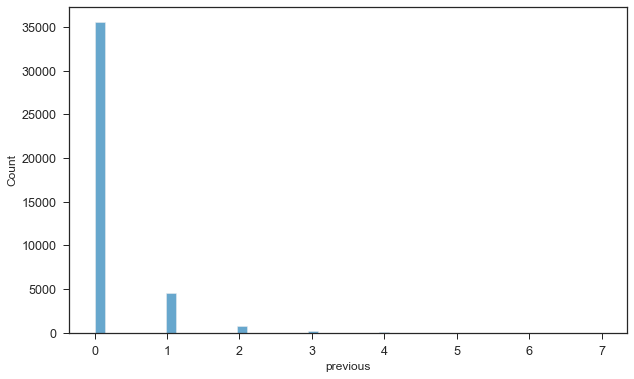

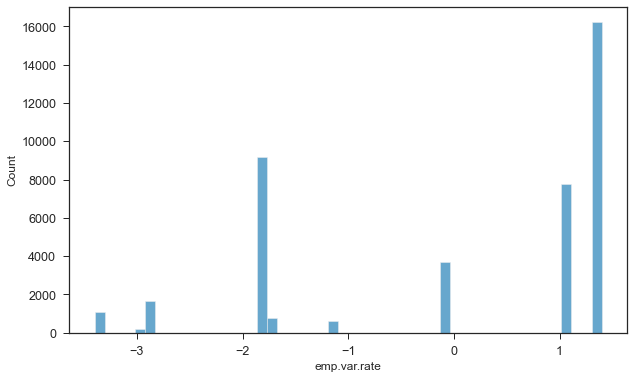

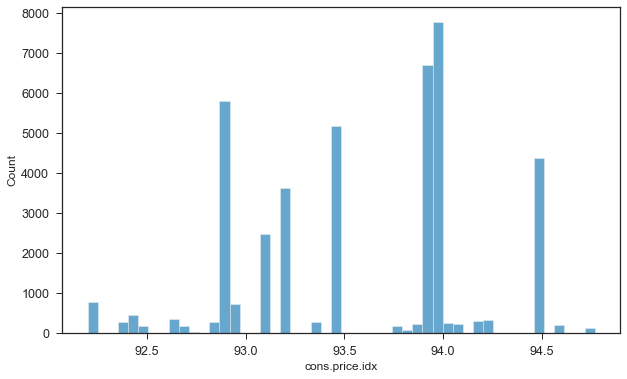

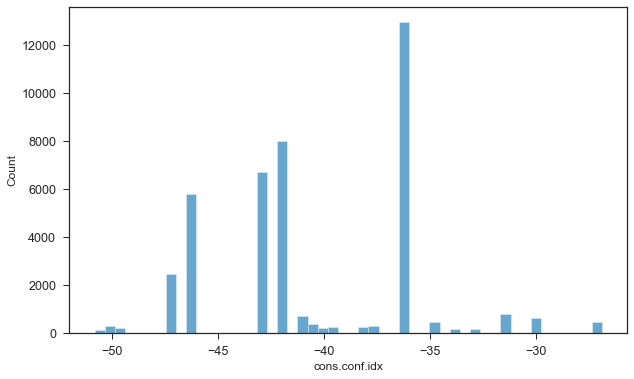

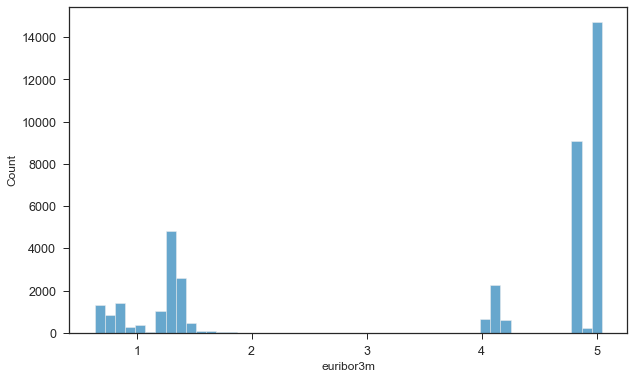

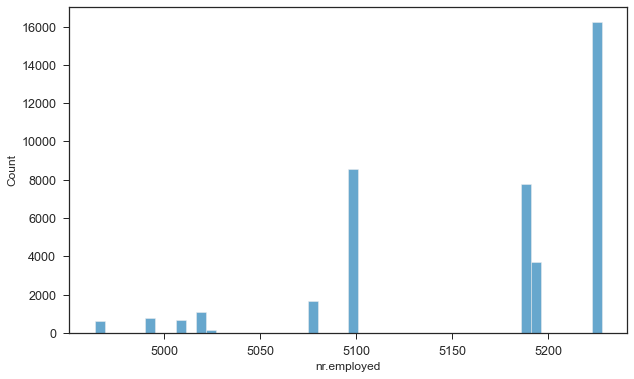

In [84]:
for col in num_cols[2:]:
    fig = plt.figure(figsize=[10, 6])
    sns.histplot(df[col], bins=50)    

Очевидно, что более-менее адекватно (достаточно уникальных значений, признак, присущий каждому клиенту, а не месячный экономический показатель и т. д.) распределен только признак campaign - количество контактов с клиентами.

<AxesSubplot:xlabel='campaign', ylabel='Count'>

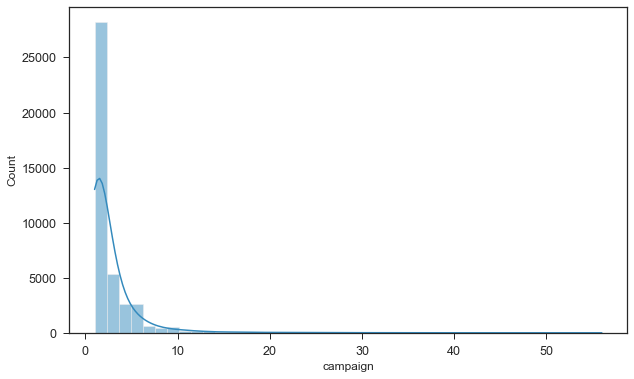

In [85]:
fig = plt.figure(figsize=[10, 6])
sns.histplot(df['campaign'], bins=42, kde = True, kde_kws={'bw_adjust': 3}) # KDE = 3 уже достаточно для нормального сглаживания

In [86]:
feature = df['campaign']

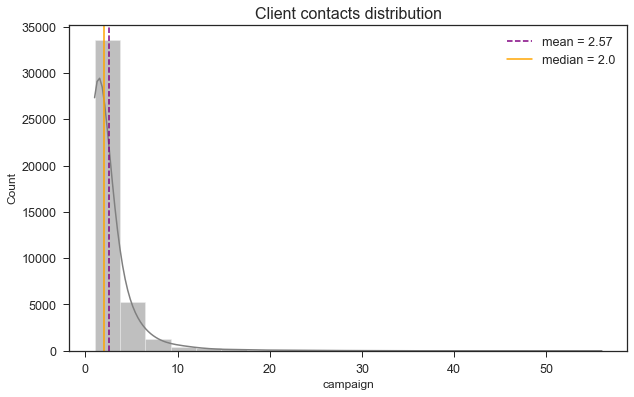

In [87]:
fig = plt.figure(figsize=[10, 6])
sns.histplot(feature, bins=20, kde=True, kde_kws={'bw_adjust': 3}, color='gray')
plt.axvline(x=feature.mean(), color='purple', linestyle='--', label = f'mean = {round(feature.mean(), 2)}')
plt.axvline(x=feature.median(), color='orange', linestyle='-', label = f'median = {feature.median()}')
plt.legend()
plt.title('Client contacts distribution', size=16)
plt.show()

In [88]:
print(f'Коэффициент асимметрии распределения контактов с клиентом равен {round(feature.skew(), 2)}')
print(f'Коэффициент эксцесса распределения контактов с клиентом равен {round(feature.kurtosis(), 2)}')

Коэффициент асимметрии распределения контактов с клиентом равен 4.76
Коэффициент эксцесса распределения контактов с клиентом равен 36.97


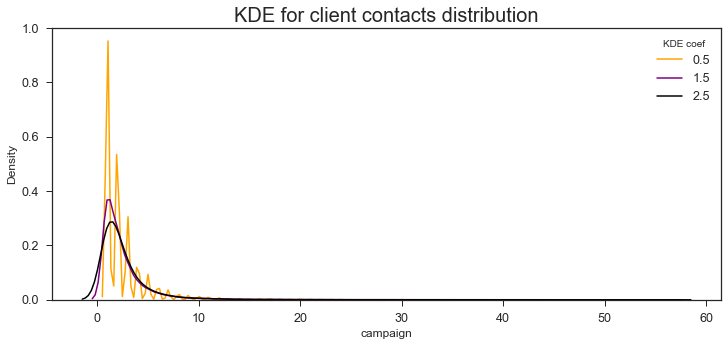

In [89]:
fig = plt.figure(figsize=[12, 5])
sns.kdeplot(feature, bw_adjust=0.5, color='orange', label = '0.5')
sns.kdeplot(feature, bw_adjust=1.5, color='purple', label = '1.5')
sns.kdeplot(feature, bw_adjust=2.5, color='black', label = '2.5')
plt.legend(title = 'KDE coef')
plt.title('KDE for client contacts distribution', size=20)
plt.show()

Сглаживающий параметр равный 2.5 уже дает хороший результат (гладкий график)

C:\Users\Eugene\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


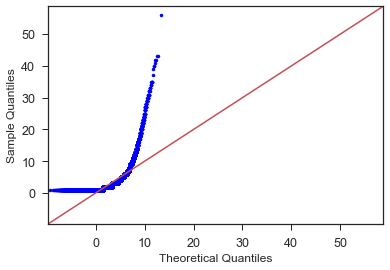

In [90]:
sm.qqplot(feature, stats.norm(feature.median(), feature.std()), line='45', marker='.')
plt.show()

И близко не прямая линия, было и до этого понятно, что выборка не из нормального распределения

## Гипотезы

In [91]:
pos_camp = df.loc[df['y'] == 1, 'campaign']
neg_camp = df.loc[df['y'] == 0, 'campaign']

In [92]:
stats.mannwhitneyu(pos_camp, neg_camp)

MannwhitneyuResult(statistic=75391969.5, pvalue=1.8146913584229173e-38)

Количество звонков согласившимся и отказавшимся не принадлежат к одному распределению

In [93]:
stats.kstest(pos_camp, neg_camp)

KstestResult(statistic=0.08082049879151998, pvalue=7.804890952010272e-24)

Количество звонков согласившимся и отказавшимся не являются идентичными

In [94]:
stats.kstest(feature, 'norm')

KstestResult(statistic=0.8413447460685429, pvalue=0.0)

Количество звонков согласившимся и отказавшимся не распределено нормально

In [95]:
stats.kruskal(pos_camp, neg_camp)

KruskalResult(statistic=166.83794105975488, pvalue=3.629350163987945e-38)

Медианы количества контактов с согласившимися и отказавшимися не равны